# 🩺 Heart Disease Prediction using Machine Learning

This project uses a Random Forest classifier to predict the presence of heart disease based on clinical parameters. The dataset is preprocessed, visualized, and used for training with evaluation metrics to validate the model's performance.


## 📦 Import Libraries

We begin by importing essential libraries for data manipulation, visualization, preprocessing, model training, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

## 📥 Load Dataset

We load the `heart.csv` dataset which contains several features like age, cholesterol levels, blood pressure, etc., and a target variable indicating the presence of heart disease (1 = Disease, 0 = No Disease).


In [4]:
#Load dataset
df = pd.read_csv('heart.csv')


## 👀 Dataset Overview

We look at the basic structure of the dataset including shape, data types, and statistical summaries.


In [5]:
print("Shape:", df.shape)
print(df.info())
print(df.describe())

Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.

### 🎯 Target Distribution

Visualizing the distribution of the target variable (Heart Disease) using a pie chart.


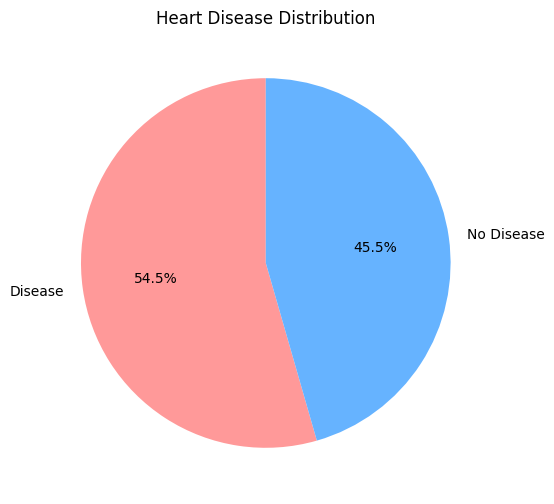

In [6]:
plt.figure(figsize=(6, 6))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Disease', 'No Disease'], colors=['#ff9999','#66b3ff'])
plt.title("Heart Disease Distribution")
plt.ylabel('')
plt.show()



### 🎻 Age vs Heart Disease

We use a violin plot to understand how age is distributed for patients with and without heart disease.


/tmp/ipython-input-1690476857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='age', data=df, palette='muted')


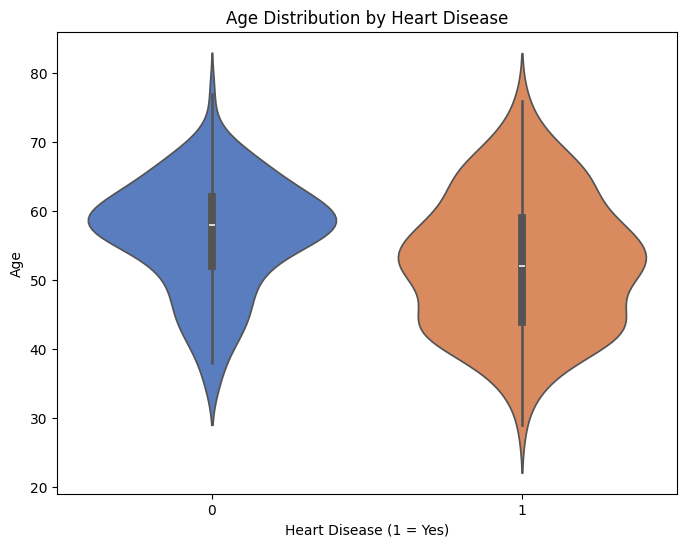

In [7]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='age', data=df, palette='muted')
plt.title("Age Distribution by Heart Disease")
plt.xlabel('Heart Disease (1 = Yes)')
plt.ylabel('Age')
plt.show()

### 📈 Cholesterol Density Plot

Comparing cholesterol levels between patients with and without heart disease.


/tmp/ipython-input-999426348.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == 0]['chol'], label="No Disease", shade=True)
/tmp/ipython-input-999426348.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == 1]['chol'], label="Disease", shade=True)


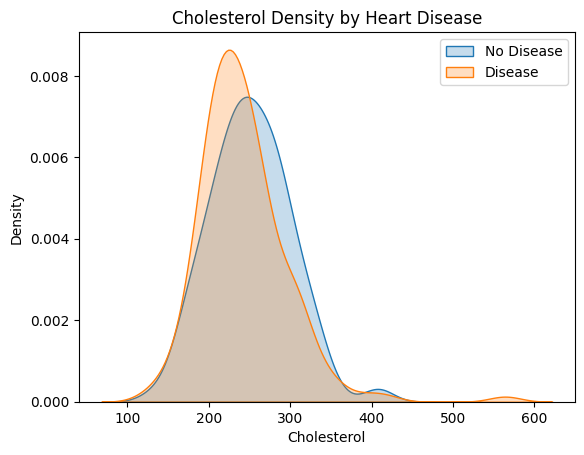

In [8]:
sns.kdeplot(df[df['target'] == 0]['chol'], label="No Disease", shade=True)
sns.kdeplot(df[df['target'] == 1]['chol'], label="Disease", shade=True)
plt.title('Cholesterol Density by Heart Disease')
plt.xlabel('Cholesterol')
plt.legend()
plt.show()



In [9]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


## 🧼 Data Preprocessing

We perform one-hot encoding on categorical columns and standardize numerical features to ensure better model performance.


In [10]:
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [11]:
X = df.drop('target', axis=1)
y = df['target']



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🌲 Model Training

We train a Random Forest Classifier using the processed data.


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 🧪 Model Evaluation

We evaluate the model using accuracy, classification report, feature importance, and confusion matrix.


In [14]:



y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### ✅ Accuracy and Classification Report

Checking how well the model performs on unseen data.


### 🔥 Feature Importance

Top 10 features contributing to the model's prediction.


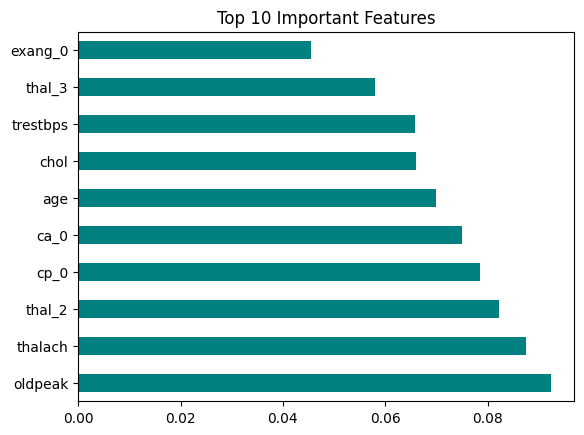

In [15]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.show()

### 📊 Confusion Matrix

Understanding the types of classification errors.


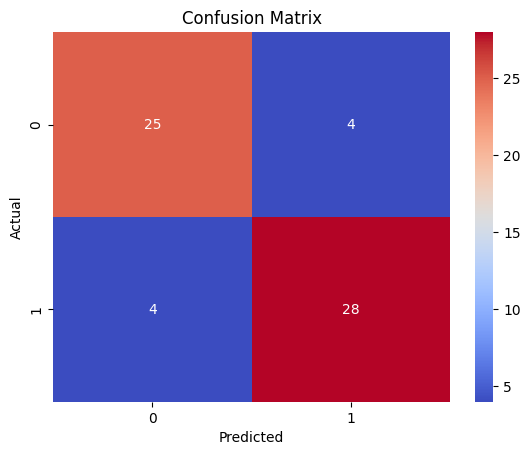

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()


## 💾 Save Model

We save the trained model and scaler using `joblib` to make predictions later or deploy the model in production.


In [17]:
joblib.dump(model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']